In [2]:
import pandas as pd
import numpy as np

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(url)

df = df.drop(['Unnamed: 0'], axis=1)

df.info() # 불러온 Dataset에 결측치 유무와 각 column의 d-type을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [3]:
# 원본데이터를 참고하여 표기에 이상있는 부분 수정 및 결측치 처리
df['Year'] = df['Year'].replace(9, 2009)
df['Year'] = df['Year'].replace(97, 1997)
df['Year'] = df['Year'].fillna('N/A') # 출시년도의 결측치는 'N/A'로 해주고 나중에 빼고 분석.
df['Genre'] = df['Genre'].fillna('ETC') # 장르의 결측치는 ETC로 분류
df['Publisher'] = df['Publisher'].fillna('ETC') # 퍼블리셔의 결측치도 ETC로 분류

In [4]:
# 단위가 다른 값들을 통일 시키고 문자열을 float로 변환
def tofloat(string):
  idx = df[string].values
  idx_float = []
  for i in idx:
    if 'K' in i:
      i = float(float(i.replace('K','')) / 1000) # 기준 단위가 M(million)이므로 1000으로 나눠야함.
      idx_float.append(i)
    elif 'M' in i:
      i = float(i.replace('M',''))
      idx_float.append(i)
    else:
      i = float(i)
      idx_float.append(i)
  df[string] = idx_float

In [5]:
tofloat('NA_Sales')
tofloat('JP_Sales')
tofloat('EU_Sales')
tofloat('Other_Sales')

In [6]:
# float로 바꾼 값의 dtypes을 object에서 float로 교체
df['NA_Sales']= df.NA_Sales.astype(float)
df['JP_Sales']= df.JP_Sales.astype(float)
df['EU_Sales']= df.EU_Sales.astype(float)
df['Other_Sales']= df.Other_Sales.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  object 
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [7]:
# Year 내에 이상값 처리
df_year_sam = df[df['Year'] == 'N/A']
df_year = df.drop(index=df_year_sam.index, axis=0)
df_year = df_year[df_year['Year'] < 1980]
df_year_1 = df_year[df_year['Year'] < 21]
df_year_2 = df_year[df_year['Year'] > 80]

df_year_1['Year'] = df_year_1.loc[:,'Year'] + 2000
df_year_2['Year'] = df_year_2.loc[:,'Year'] + 1900

df_year = pd.concat([df_year_1, df_year_2])
df_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
213,NASCAR Unleashed,PS3,2011,Racing,Activision,0.09,0.00,0.00,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015,Action,Little Orbit,0.00,0.02,0.00,0.00
768,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,0.53,0.41,0.00,0.14
1220,Ratchet & Clank: Going Commando,PS2,2003,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1364,LEGO Star Wars II: The Original Trilogy,PS2,2006,Action,LucasArts,1.85,0.64,0.01,0.19
...,...,...,...,...,...,...,...,...,...
11334,Super Fire ProWrestling X,SNES,1995,Fighting,Human Entertainment,0.00,0.00,0.28,0.00
14572,S.C.A.R.S,PS,1998,Racing,Ubisoft,0.05,0.03,0.00,0.01
14785,GOTHA: Ismailia Seneki,SAT,1995,Strategy,Sega,0.00,0.00,0.08,0.00
15985,Sugoi Hebereke,SNES,1994,Fighting,Sunsoft,0.00,0.00,0.02,0.00


In [8]:
df_year.index
df.loc[df_year.index,'Year'] = df_year['Year'].values
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [9]:
# 전체 판매량을 구하기위해 'Total_Sales' 컬럼을 만들어주고 값 입력
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 지역에 따라 선호하는 게임의 장르가 다를까?



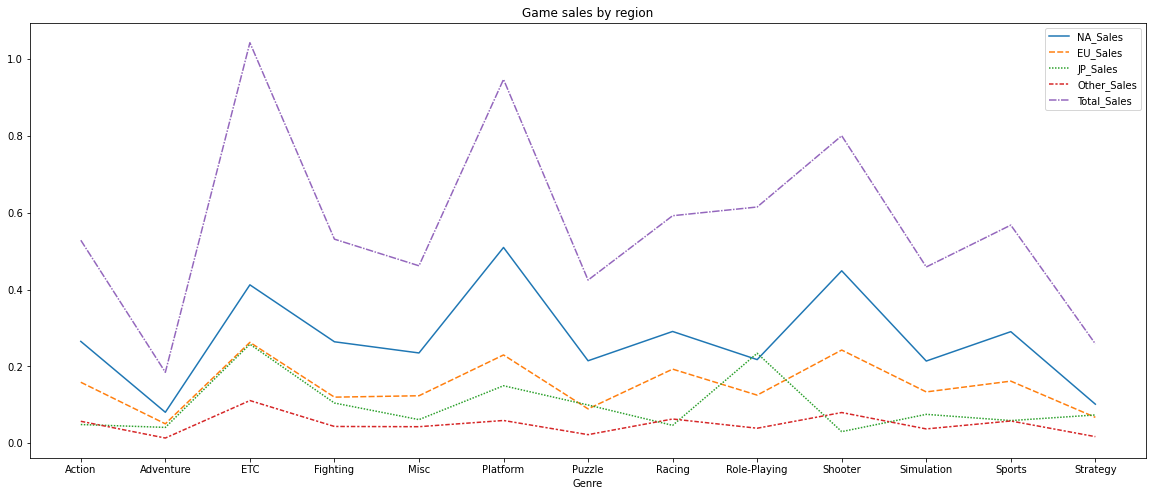

In [11]:
# 장르와 지역별 판매량 그래프
import seaborn as sns
import matplotlib.pyplot as plt

df_test = df.drop(df[df['Year']=='N/A'].index, axis=0)
sns.lineplot(data=df_test.groupby('Genre').mean())
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Game sales by region')
plt.show()
# plt.savefig('image(1).jpg', dpi=200)

지역마다 선호하는 게임의 장르를 알아보기위해 Genre로 groupby하여 그래프를 그렸다.

그 결과, 대부분의 장르는 움직이는 방향이 비슷하지만 다르게 움직이는 특정 장르가 있었다.

제일 다르게 나타나는 지역이 일본이었는데, 특히 Role-Playing장르에서 선호도가 다른 지역에 비해높았고, 

Raicing, Shooter 장르는 다른지역에 비해 낮았다.

유럽과 북미지역은 그래프가 거의 같은 모양으로 움직였지만 Misc장르에서는 반대로 움직였다.

# 연도별 게임의 트렌드가 있을까?

In [10]:
# 연도별 트렌드를 알아보기위해 'Year', 'Genre', 'Total_Sales' column만 추출
df_trend = df[['Year','Genre','Total_Sales']]
df_trend

,Year,Genre,Total_Sales
0,2008,Action,0.04
1,2009,Action,0.18
2,2010,Adventure,0.02
3,2010,Misc,0.04
4,2010,Platform,0.25
...,...,...,...
16593,2006,Platform,0.20
16594,2005,Action,0.01
16595,2015,Sports,0.79
16596,2013,Action,0.38


In [11]:
# Group by를 통해 장르별로 판매량을 모두 더해줌.
df_trend = df_trend.drop(df[df['Year']=='N/A'].index, axis=0)
df_trend.groupby(['Year', 'Genre']).sum()

Total_Sales
Year   Genre                    
1980.0 Action               0.34
       ETC                  0.50
       Fighting             0.77
       Misc                 2.70
       Shooter              7.07
...                          ...
2016.0 Sports              14.63
       Strategy             0.52
2017.0 Action               0.01
       Role-Playing         0.04
2020.0 Simulation           0.29

[407 rows x 1 columns]

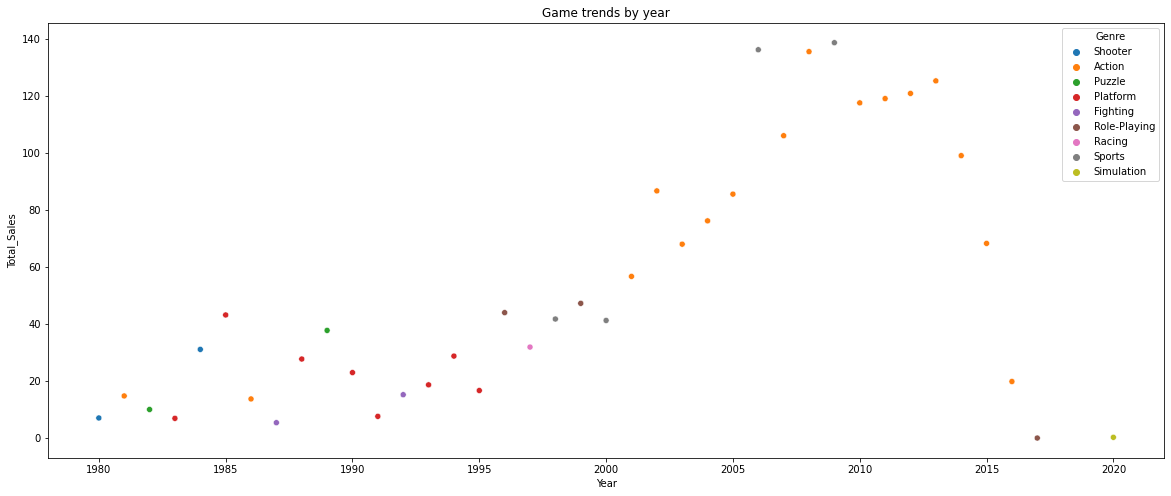

In [12]:
# 연도별로 제일 많이 팔린 게임의 장르를 확인하기위해 sort_values를 사용하고 상위 한개의 장르만 표시
df_trend_1 = df_trend.groupby(['Year', 'Genre']).sum()
df_trend_1 = df_trend_1.sort_values(by='Total_Sales', ascending=False).groupby('Year', sort=False).head(1)
df_trend_1 = df_trend_1.sort_index()
# 보기쉽게 시각화 그래프로 나타냄.
sns.scatterplot(x='Year', y='Total_Sales', hue='Genre',data=df_trend_1)
plt.title('Game trends by year')
# plt.savefig('image(2).jpg', dpi=200)
plt.show()

연도별 게임의 트렌드를 알아보기 위해 'Year', 'Genre', 'Total_Sales'의 정보만 가지고 왔다.

Lineplot으로 그리기엔 알아보기 힘들정도로 더럽게 나외서 Scatterplot으로 대략적인 위치만 찍어줬다.

2000년도 전까지는 게임의 트렌드가 굉장히 다양한것을 알 수 있다. 하지만 2000년대 이후를 보면 Action, Sports 장르가 트렌드라는 것을 알 수 있다.

아마도 플랫폼이 발전하면서 고퀄리티의 그래픽을 사용할 수 있게된 것이 큰 영향이었을거라 예상했다.

# 연도 별 가장 판매량이 높은 Platform은 무엇일까

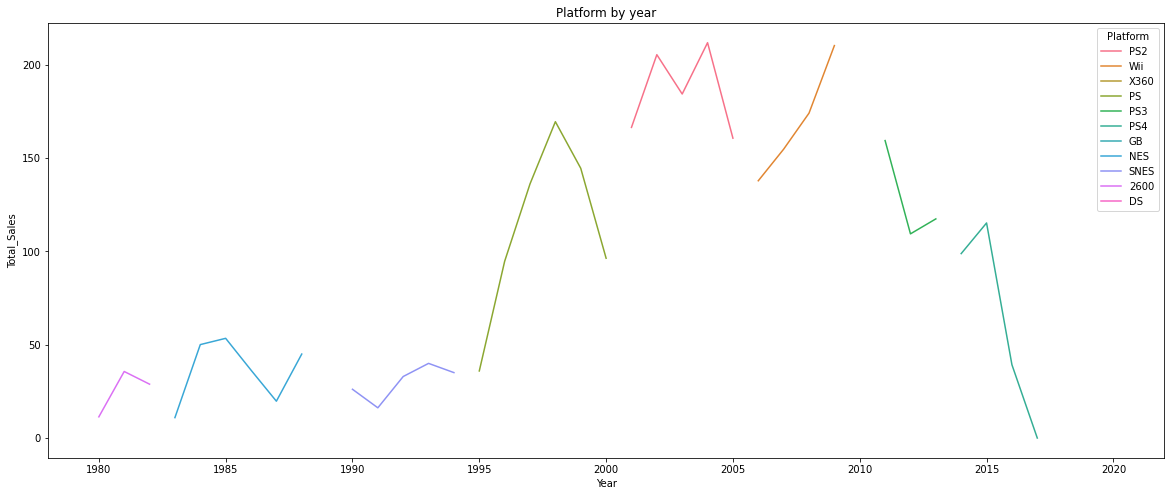

In [13]:
# 연도 별 가장 판매량이 높은 Platform을 확인하는 그래프
df_platform = df.groupby(['Year', 'Platform']).sum()
df_platform = df_platform.drop('N/A', axis=0)
df_platform = df_platform.sort_values(by='Total_Sales', ascending=False).groupby('Year', sort=False).head(1)
sns.lineplot(x='Year', y='Total_Sales', hue='Platform', data=df_platform)
plt.title('Platform by year')
# plt.savefig('image(3).jpg', dpi=200)
plt.show()

다음 분기의 판매 전략을 결정하기 위해서는 플랫폼 또한 중요하다고 생각한다.

처음엔 가장 높은 판매량의 플랫폼을 Scatter plot으로 그려보고 같은 색의 점들이 특정기간에만 있는 것을 확인했다.

Line plot을 그려보니 다음과 같은 그래프를 얻을 수 있었다.

그래프가 저런 모양으로 그려지는 이유는 플랫폼은 항상 발전하고 예전 플랫폼을 대상으로 게임을 개발하는 것이 아닌 

새로운 플랫폼을 대상으로 게임을 개발하기 때문이다.

Wii에 대한 Data가 조금 아쉬운데, 2020년도까지의 Data가 충분히 많았다면 다음 분기에 어떤 플랫폼을 대상으로 게임을 개발해야하는지 더 정확해 질 것 같다.

# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [14]:
# Total_Sales가 1 이상인 data만 따로 추출
df_top_sale = df[df['Total_Sales'] >= 1]
df_top_sale = df_top_sale.drop(df_top_sale[df_top_sale['Year']=='N/A'].index, axis=0)
df_top_sale = df_top_sale.reset_index()
df_top_sale = df_top_sale.drop(['index'], axis=1)
df_top_sale

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Ty the Tasmanian Tiger,PS2,2002,Platform,Electronic Arts,0.57,0.45,0.00,0.15,1.17
1,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25
2,Bomberman,NES,1985,Puzzle,Hudson Soft,0.18,0.00,0.85,0.00,1.03
3,Kirby: Mass Attack,DS,2011,Platform,Nintendo,0.52,0.06,0.41,0.05,1.04
4,Disney Universe,Wii,2011,Action,Disney Interactive Studios,0.67,0.30,0.00,0.10,1.07
...,...,...,...,...,...,...,...,...,...,...
2052,Finding Nemo,PS2,2003,Action,THQ,1.26,0.60,0.05,0.18,2.09
2053,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
2054,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13,1.43
2055,Need for Speed Underground 2,XB,2004,ETC,Electronic Arts,1.38,0.80,0.00,0.10,2.28


In [15]:
# 연도 별 출고량이 높은 장르가 얼마나 있는지 알기위해 value_counts를 사용
df_top_sale_1 = df_top_sale[['Year','Genre']]
df_top_sale_Genre = pd.DataFrame(df_top_sale_1.value_counts())
df_top_sale_Genre.columns = ['count']
df_top_sale_Genre = df_top_sale_Genre.sort_values(by='Year', ascending=True)
df_top_sale_Genre = df_top_sale_Genre.reset_index()
df_top_sale_Genre

,Year,Genre,count
0,1980.0,Shooter,2
1,1980.0,Misc,2
2,1981.0,Puzzle,1
3,1981.0,Shooter,6
4,1981.0,Platform,2
...,...,...,...
331,2016.0,Role-Playing,1
332,2016.0,Fighting,1
333,2016.0,Shooter,5
334,2016.0,Sports,4


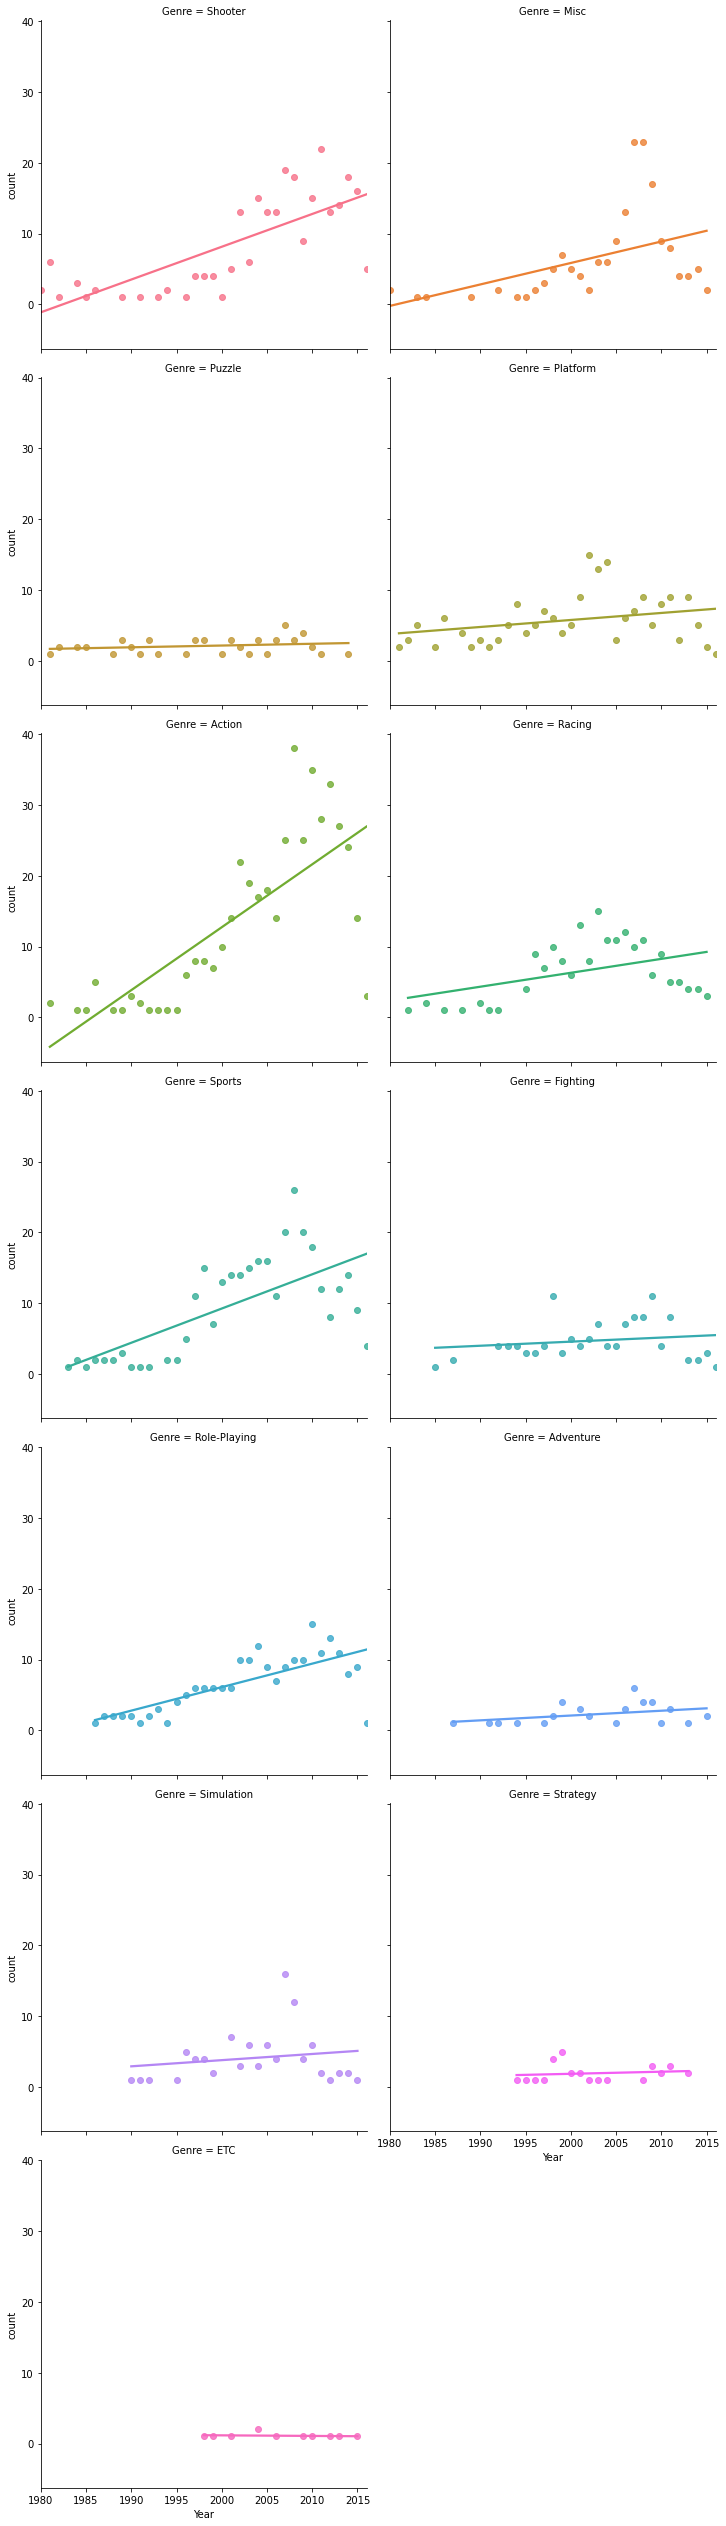

In [16]:
# 위 정보 시각화
sns.lmplot(x='Year', y='count', hue='Genre', col='Genre',data=df_top_sale_Genre, col_wrap=2, ci=None)
# plt.savefig('image(4)', dpi=200)
plt.show()

장르별로 그래프를 뽑으니 매우 많지만, 의미있는 그래프만을 보면

Action, Role-playing, Sports, Shooter 장르를 중점으로 보면 된다.

이 4개의 그래프는 시간이 지날수록 더 많아지고 있고, 특히 Action은 출고량이 높은 항목들 중 가장 변동이 크다.

Role-playing의 경우 앞서 말했듯이 일본의 영향이 큰 것으로 보인다.

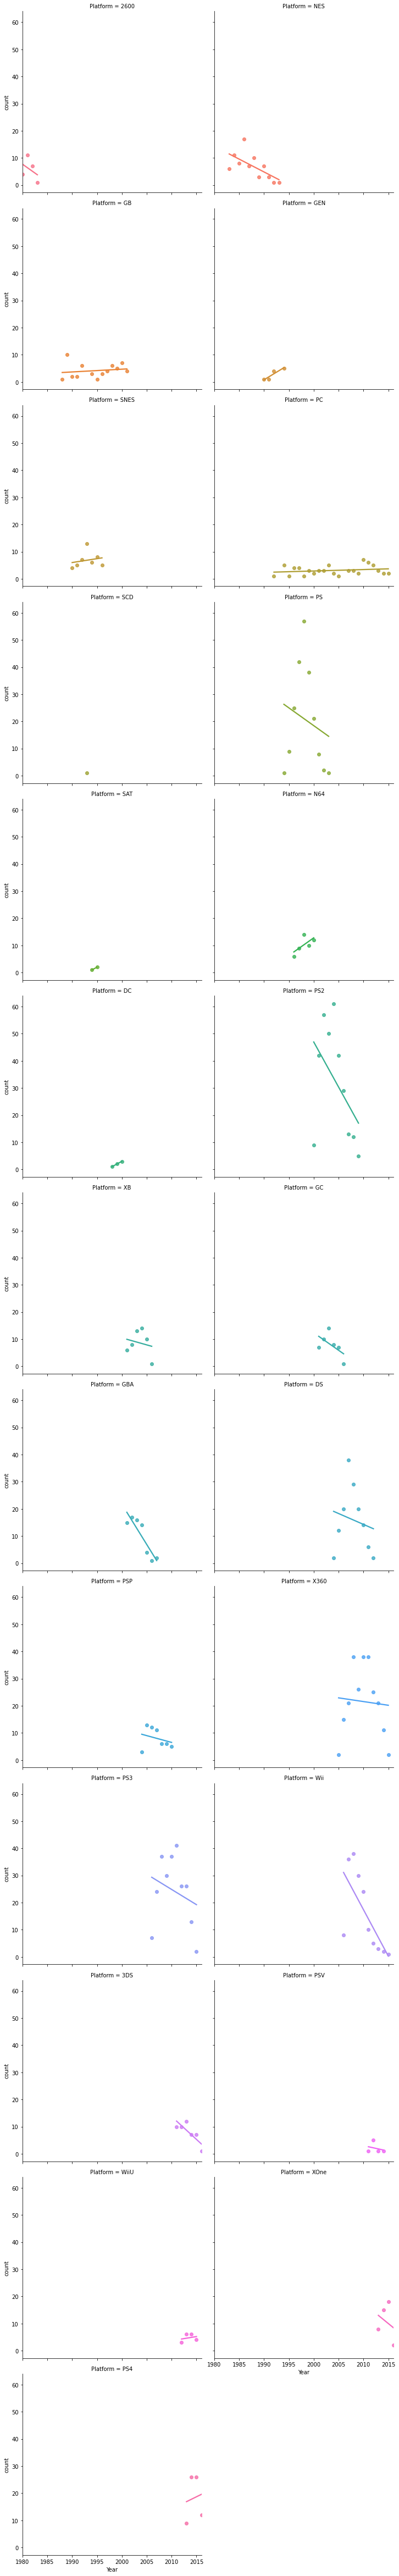

In [22]:
# 연도 별 플랫폼의 빈도도 알기 위해 value_counts 사용하여 시각화
df_top_sale_2 = df_top_sale[['Year', 'Platform']]
df_top_sale_Platform = pd.DataFrame(df_top_sale_2.value_counts())
df_top_sale_Platform.columns = ['count']
df_top_sale_Platform = df_top_sale_Platform.sort_values(by='Year', ascending=True)
df_top_sale_Platform = df_top_sale_Platform.reset_index()

sns.lmplot(x='Year', y='count', hue='Platform', col='Platform',data=df_top_sale_Platform, col_wrap=2, ci=None)
# plt.show()
plt.savefig('image(5)', dpi=200)

출고량이 높은 Platform이 얼마나 있는지 그래프로 나타냈다.

위 그래프와 다르게 이번 그래프는 어느 Platform에서 꾸준하게 출고가 되었는지를 봤다.

PC를 보면 1995년도 부터 꾸준하게 나타는 것을 알 수 있다. 그리고 가장 최근에 나타나는 Platform도

확인해볼 필요가 있다.

PC은 경우는 최근까지 꾸준하게 나타는 것으로 보아 앞으로 전략을 세우는데 있어서 충분히 참고 할 만한 자료라고 생각하고

비교적 최근에 나타나는 WiiU, Xone, PS4는 소비자들이 최근에 출시한 Platform을 이용할 것이라는

예상에 충분히 참고할 만한 자료라고 생각한다.

# 결론

일단 가장 최근의 데이터 위주로 살펴보면, 장르부분에선 Action, Sports가 앞으로 출시할만한 게임이라고 예상된다. 

지역별로는 북미와 유럽 그리고 기타지역의 경우는 같은 장르를 판매하는 전략으로 가는 것이 좋고, 일본의 경우엔 특히 출고량이 높은 Role-playing을 주요 전략으로 가져가면 좋을 것이라 예상된다.

Platform의 경우 상위권에서 꾸준히 나타나고 있는 PC, 그리고 최근에 출시된 것으로 보이는 WiiU, Xone, PS4를 주요전략으로 취하는 것이 좋다고 생각한다. 